In [8]:
import dolfin as df

mesh = df.UnitSquareMesh(20, 20)

P_el = df.FiniteElement("Lagrange", mesh.ufl_cell(), 1) # P1 elements
P = df.FunctionSpace(mesh, P_el)
p = df.TrialFunction(P)
q = df.TestFunction(P)

# K = df.Constant(1.0) # Constant
K = df.Expression("pow(sin(3*x[0])*sin(4*x[1]), 2)+0.1", degree=2)
f = df.Constant(0.0) # zero

#Write down variational form:
a = K * df.dot(df.grad(p), df.grad(q)) * df.dx
L = f * q * df.dx

p_in = 1.0

def top(x, on_boundary):
    return on_boundary and x[1] > 1.0 - df.DOLFIN_EPS

def btm(x, on_boundary):
    return on_boundary and x[1] < df.DOLFIN_EPS

bc_in = df.DirichletBC(P, df.Constant(p_in), top)
bc_out = df.DirichletBC(P, df.Constant(0.0), btm)
bcs = [bc_in, bc_out]

In [9]:
p_ = df.Function(P)
df.solve(a == L, p_, bcs) # Linear

Solving linear variational problem.


In [10]:
import matplotlib.pyplot as plt

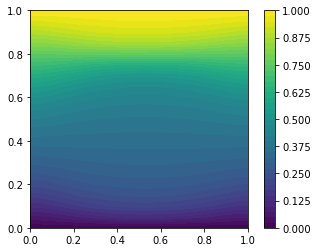

In [11]:
fig = df.plot(p_, "Pressure")
plt.colorbar(fig)

In [12]:
U_el = df.VectorElement("DG", mesh.ufl_cell(), 0)  # Constant in cell
U = df.FunctionSpace(mesh, U_el)
u_ = df.project(-K*df.grad(p_), U)

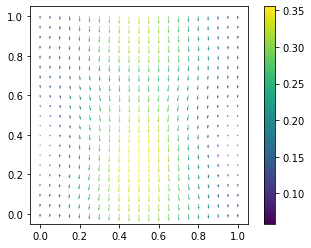

In [13]:
fig = df.plot(u_, "Velocity")
plt.colorbar(fig)